In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Number of columns with missing values: []
Outliers information: 
duration                       0.0
protocol_type                  0.0
service                        0.0
flag                           0.0
src_bytes                      0.0
dst_bytes                      0.0
land                           0.0
wrong_fragment                 0.0
urgent                         0.0
hot                            0.0
num_failed_logins              0.0
logged_in                      0.0
num_compromised                0.0
root_shell                     0.0
su_attempted                   0.0
num_root                       0.0
num_file_creations             0.0
num_shells                     0.0
num_access_files               0.0
num_outbound_cmds              0.0
is_host_login                  0.0
is_guest_login                 0.0
count                          0.0
srv_count                      0.0
serror_rate                    0.0
srv_serror_rate                0.0
rerror_rate              

In [3]:
train_data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [5]:
test_data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [6]:
train_data.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

Number of columns with missing values: []


In [8]:
#Checking duplicate values
duplicates=train_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [36]:
#Performing label encoding on non numeric columns
from sklearn.preprocessing import LabelEncoder

def LabelEncode(df):
    for col in df.columns:
        if df[col].dtype=='object':
            label_encoder=LabelEncoder()
            df[col]=label_encoder.fit_transform(df[col])

LabelEncode(train_data)
LabelEncode(test_data)

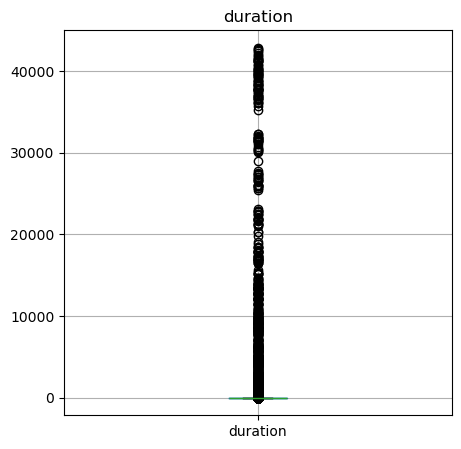

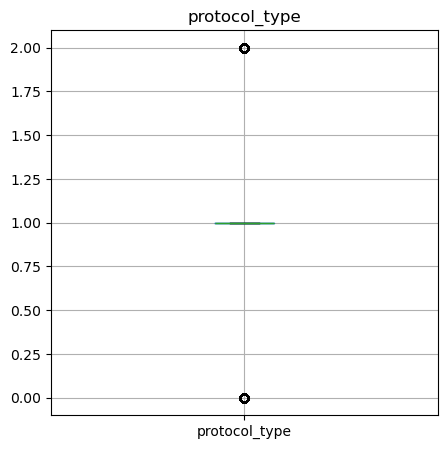

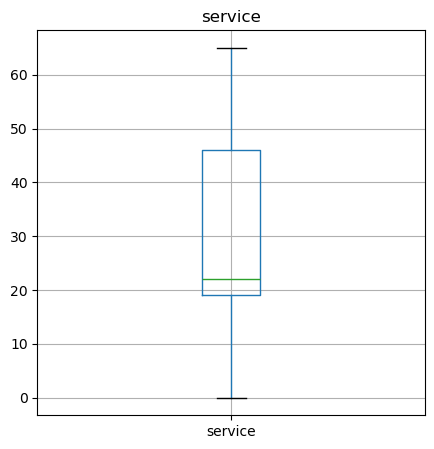

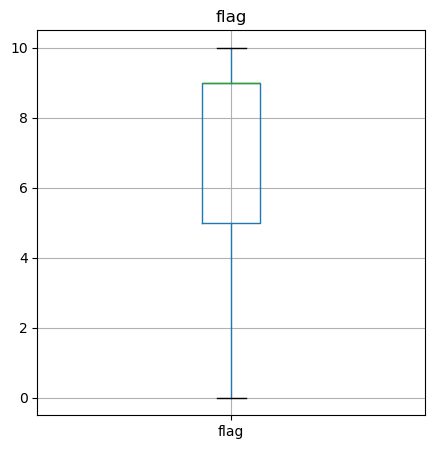

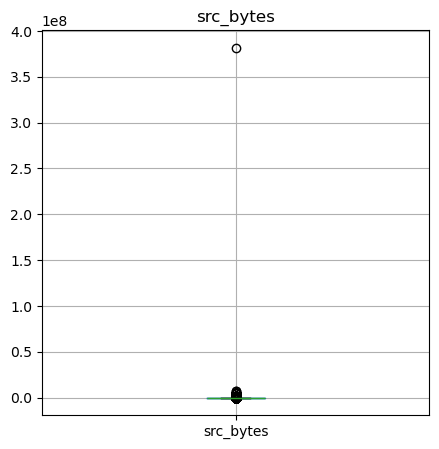

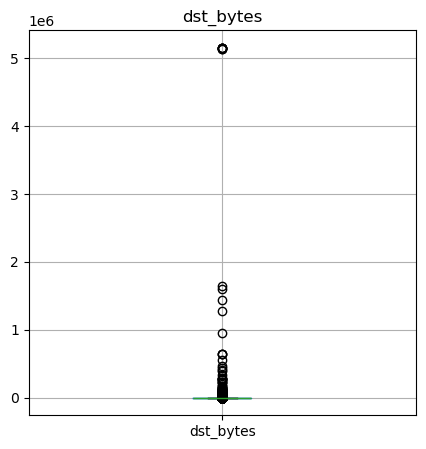

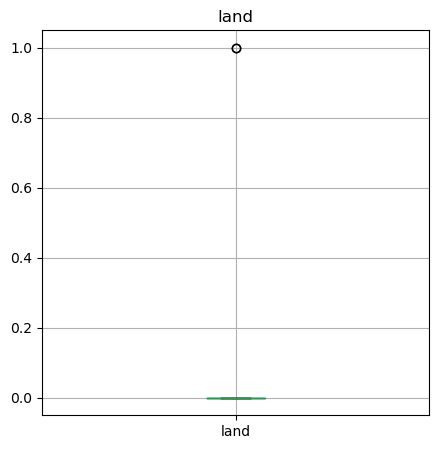

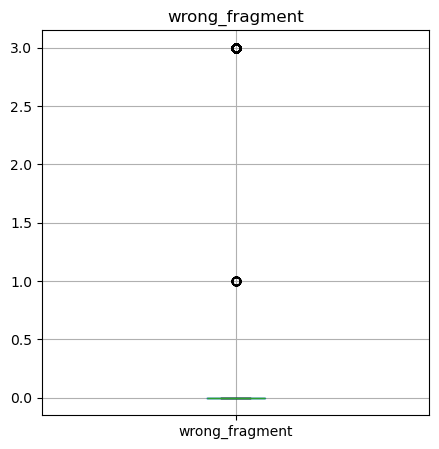

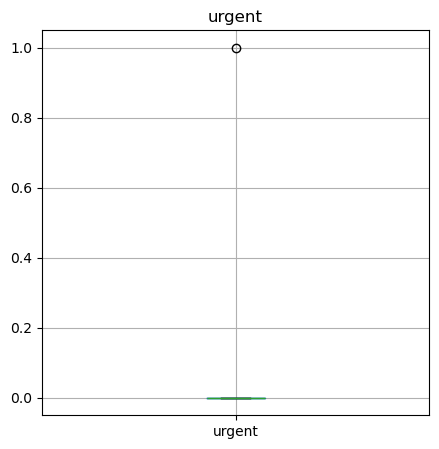

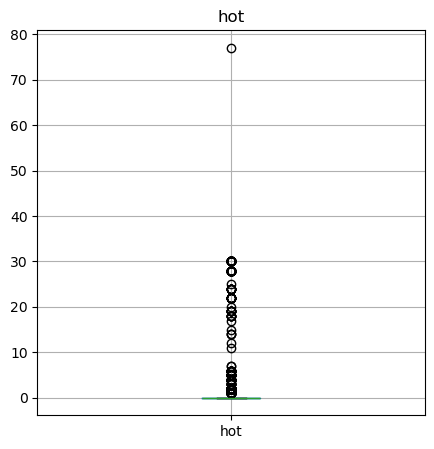

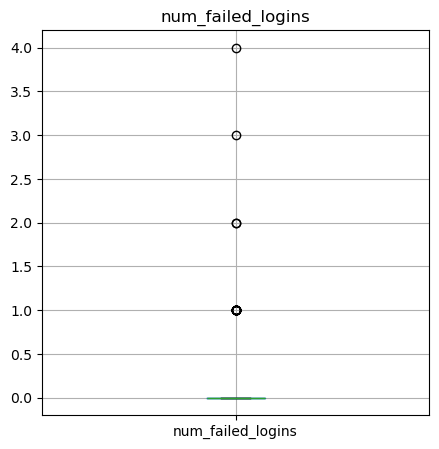

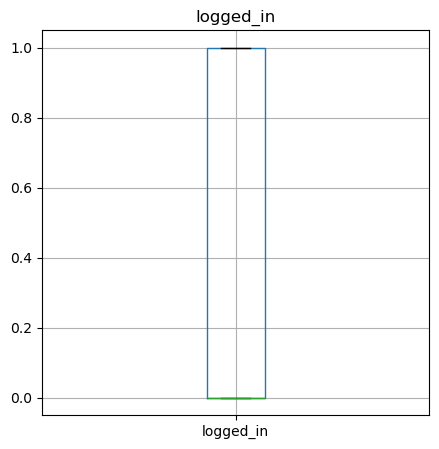

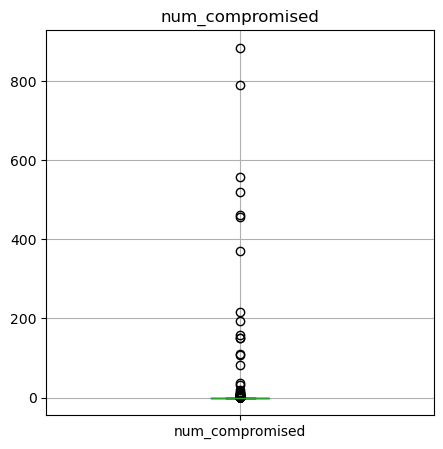

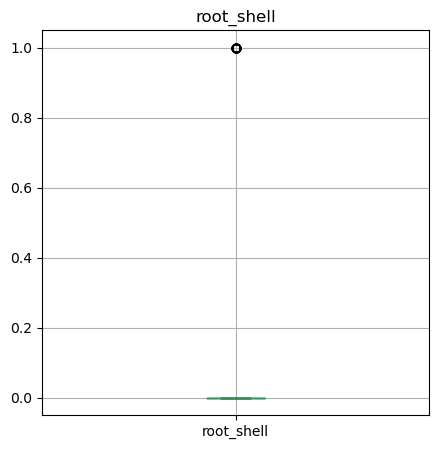

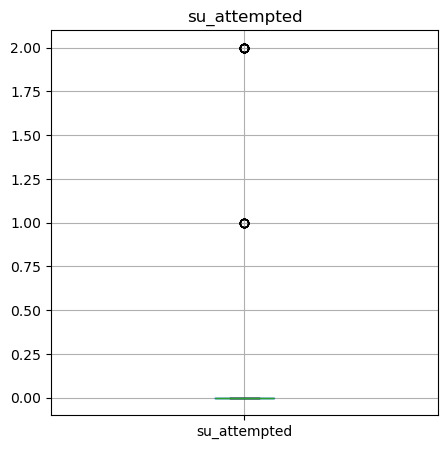

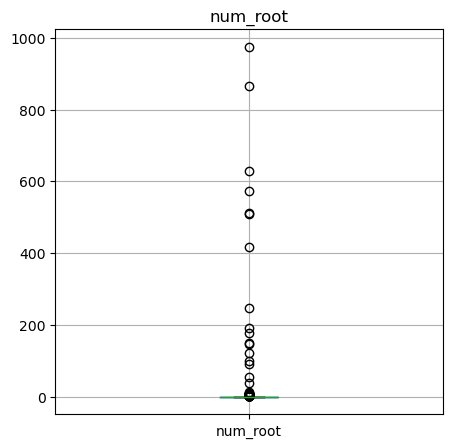

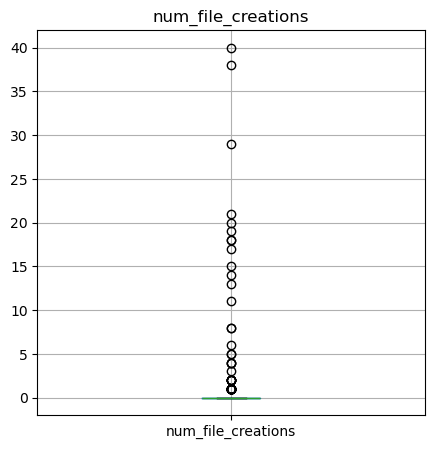

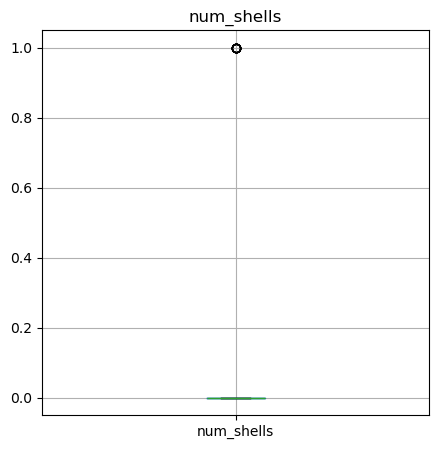

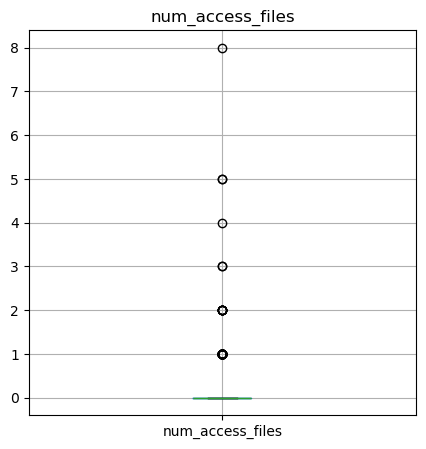

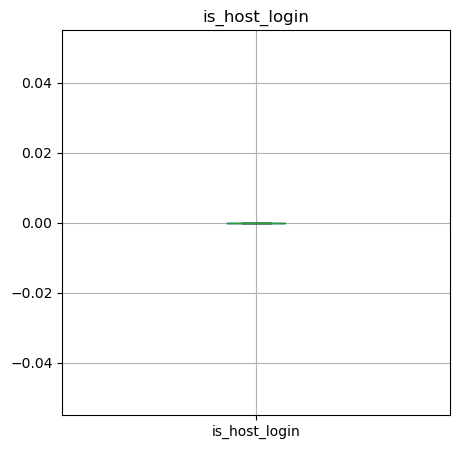

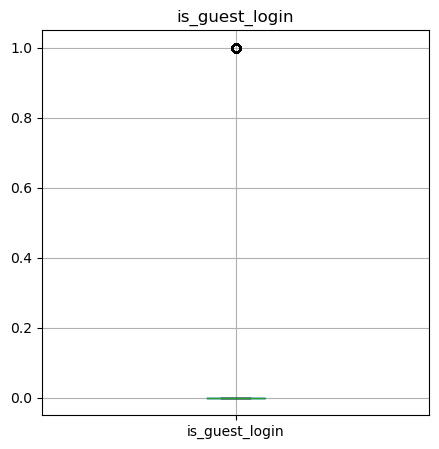

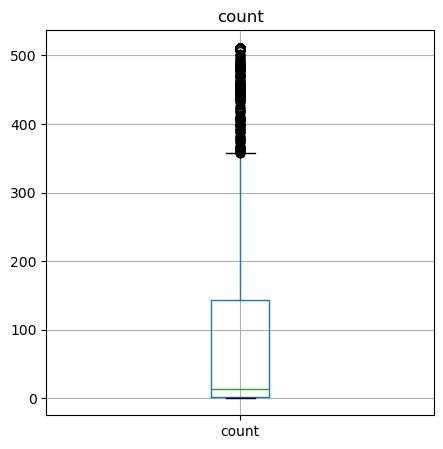

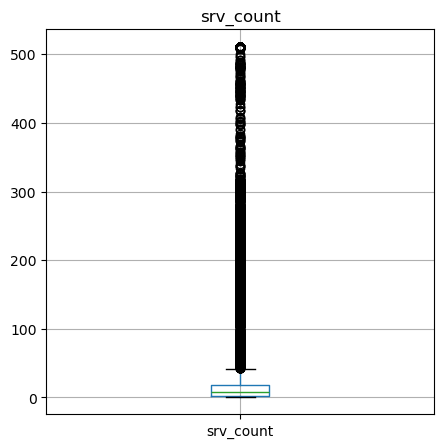

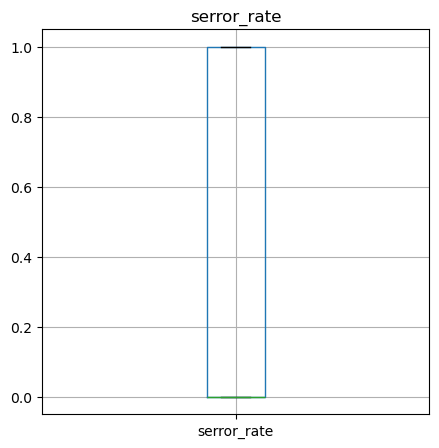

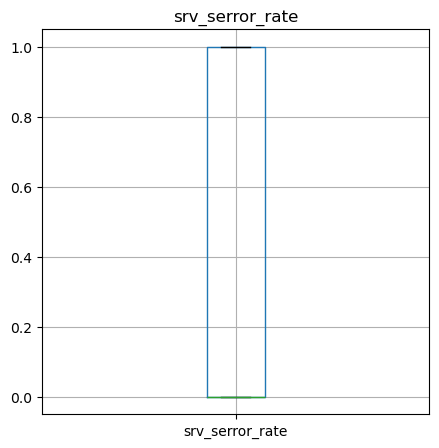

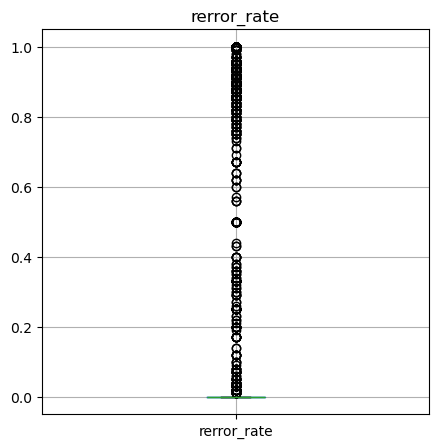

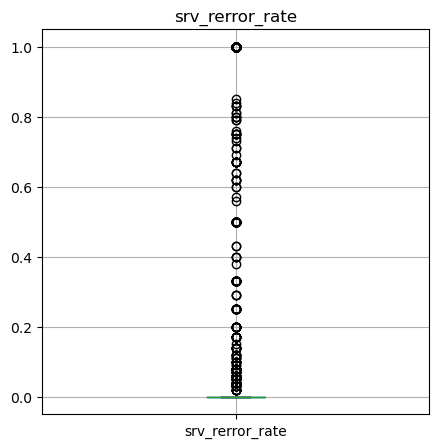

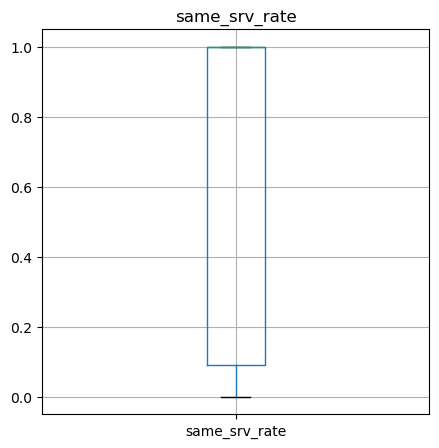

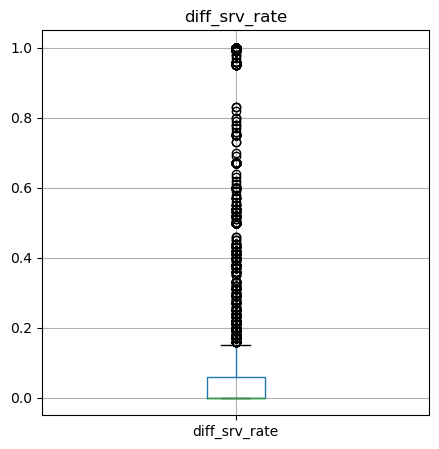

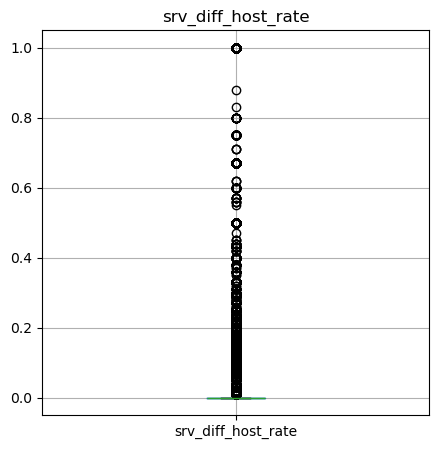

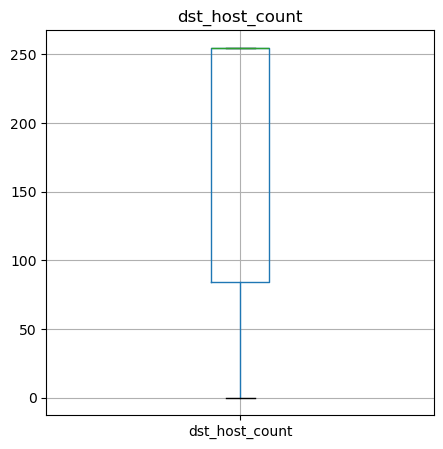

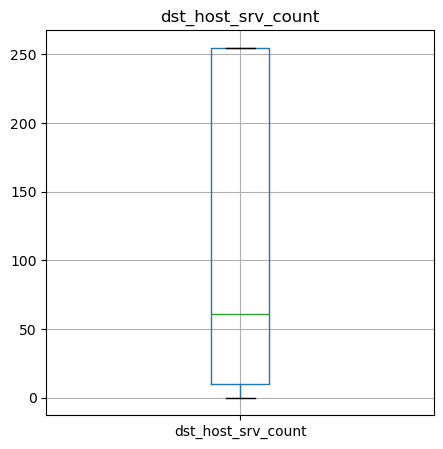

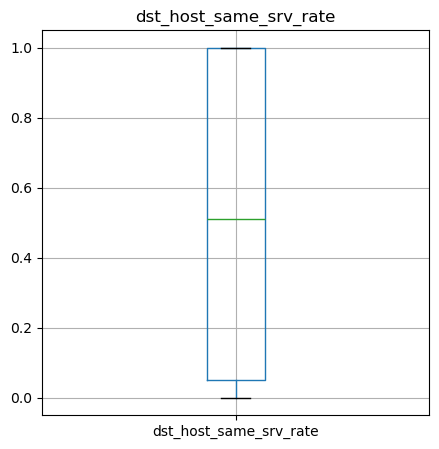

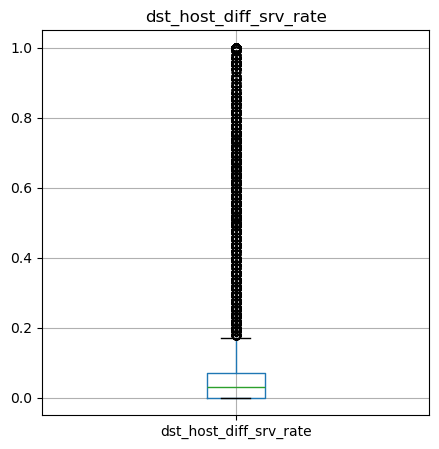

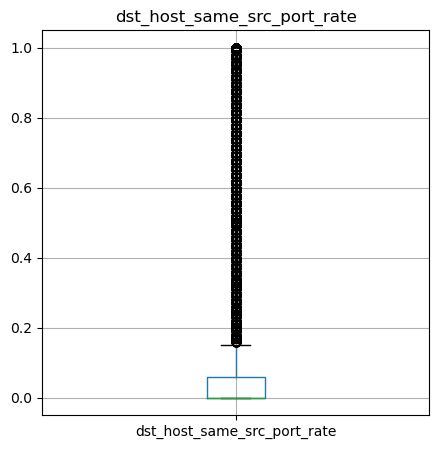

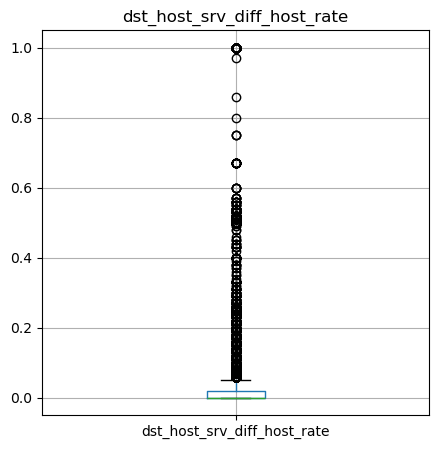

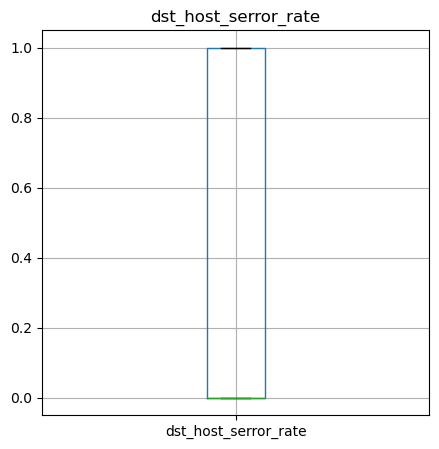

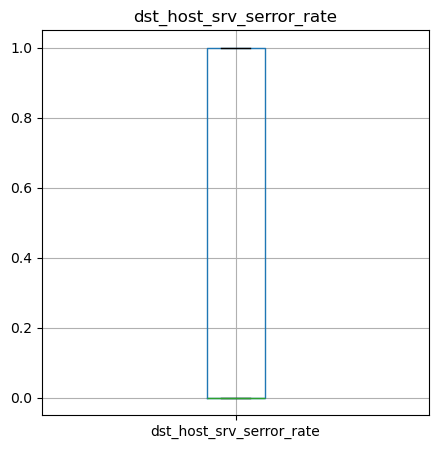

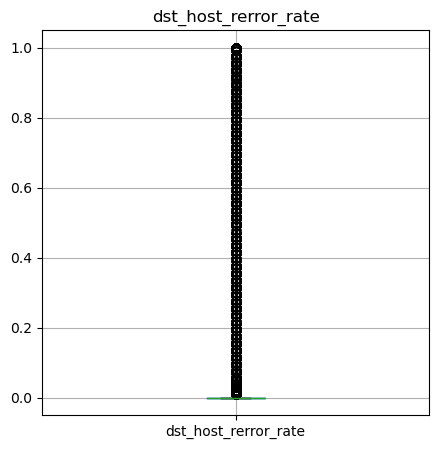

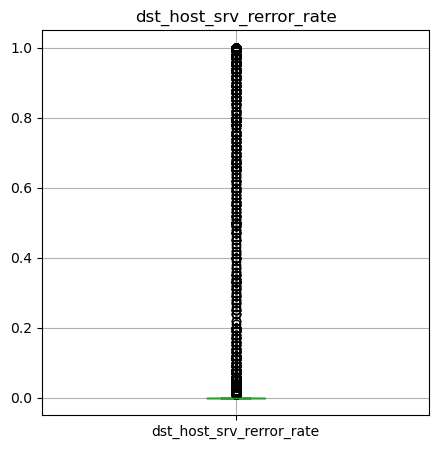

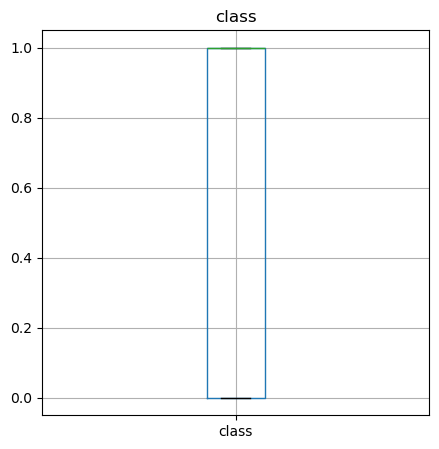

In [39]:
for col in train_data.select_dtypes(include = ['int', 'float']).columns:
  fig, aux = plt.subplots(figsize = (5, 5))
  aux.set_title(col)
  b_plot = train_data.boxplot(column = col, ax = aux)
  plt.show()

Outliers information: 
duration                       0.0
protocol_type                  0.0
service                        0.0
flag                           0.0
src_bytes                      0.0
dst_bytes                      0.0
land                           0.0
wrong_fragment                 0.0
urgent                         0.0
hot                            0.0
num_failed_logins              0.0
logged_in                      0.0
num_compromised                0.0
root_shell                     0.0
su_attempted                   0.0
num_root                       0.0
num_file_creations             0.0
num_shells                     0.0
num_access_files               0.0
is_host_login                  0.0
is_guest_login                 0.0
count                          0.0
srv_count                      0.0
serror_rate                    0.0
srv_serror_rate                0.0
rerror_rate                    0.0
srv_rerror_rate                0.0
same_srv_rate                  0

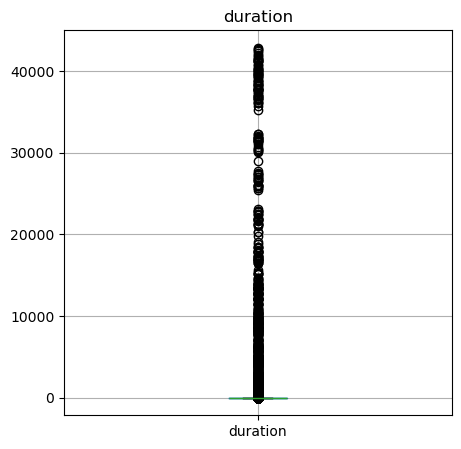

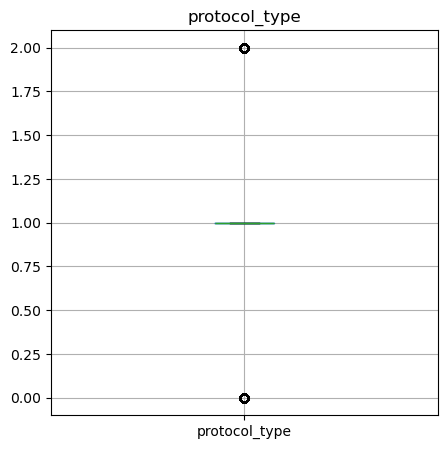

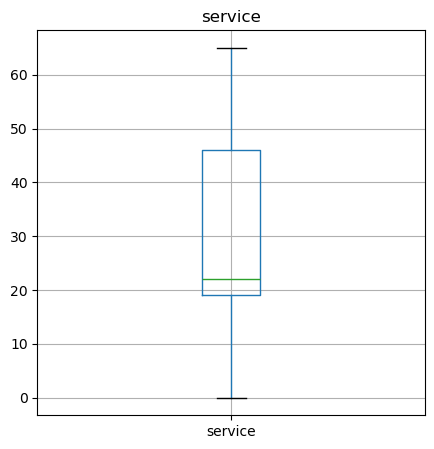

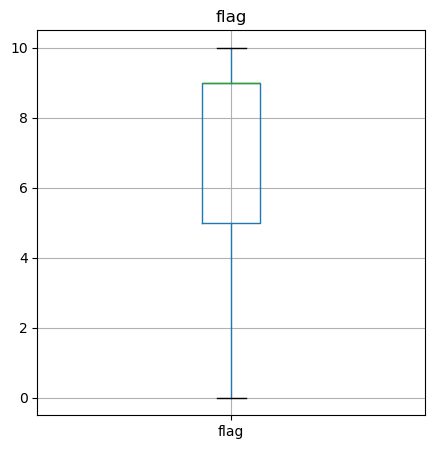

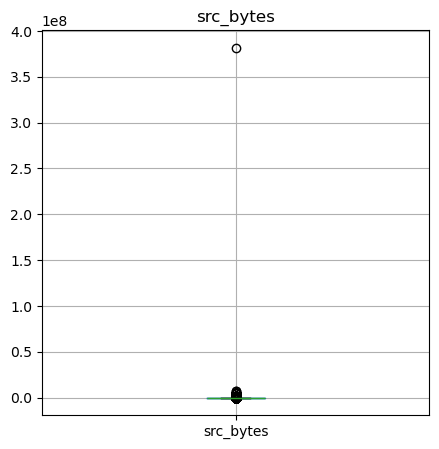

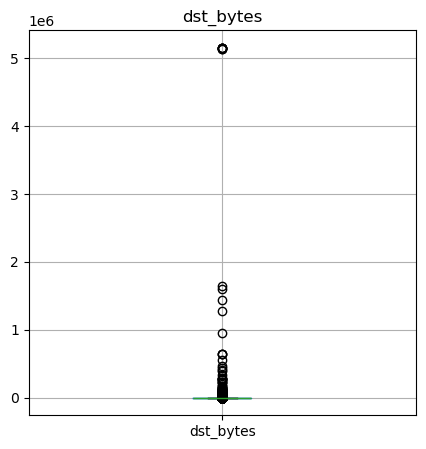

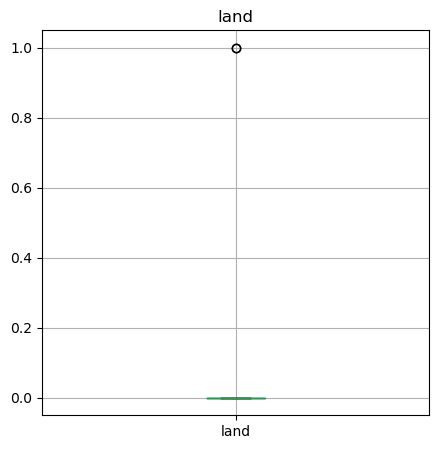

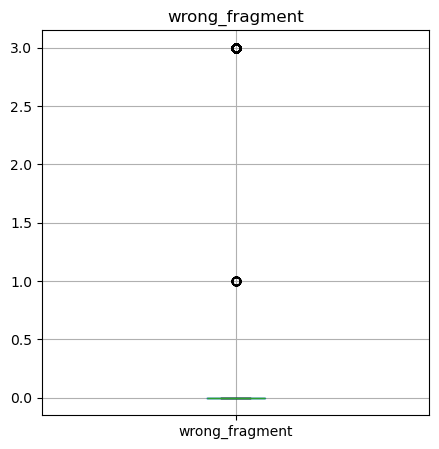

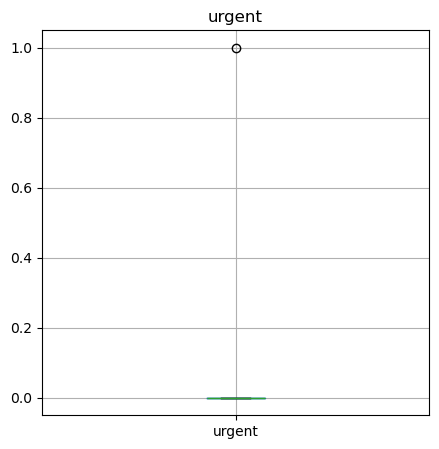

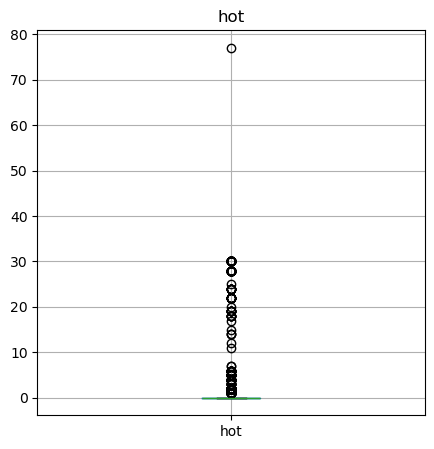

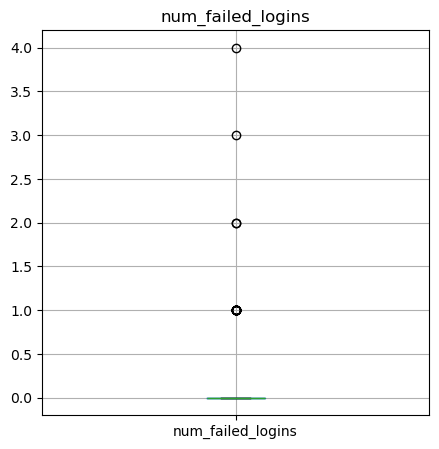

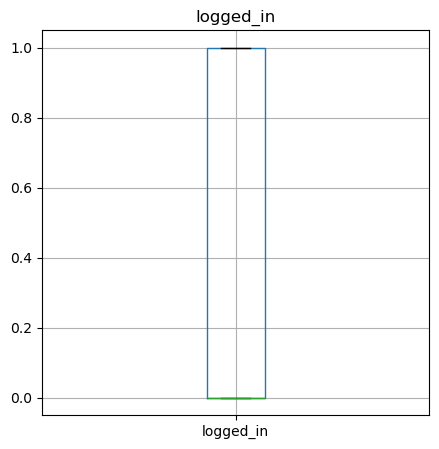

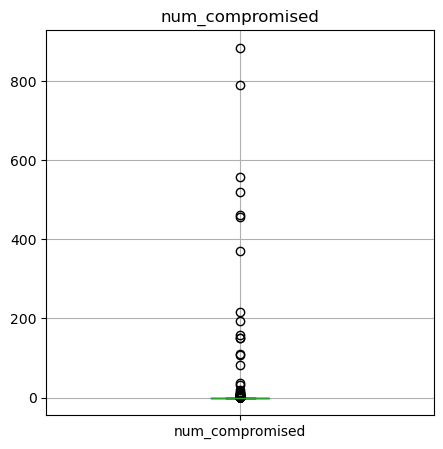

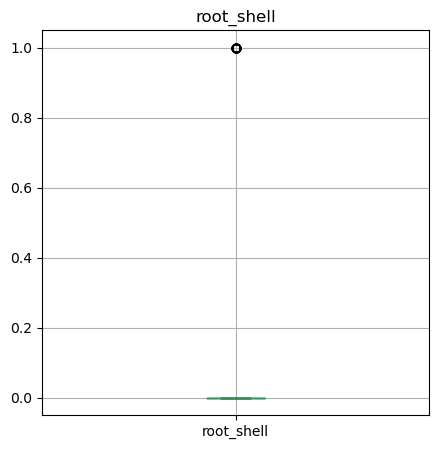

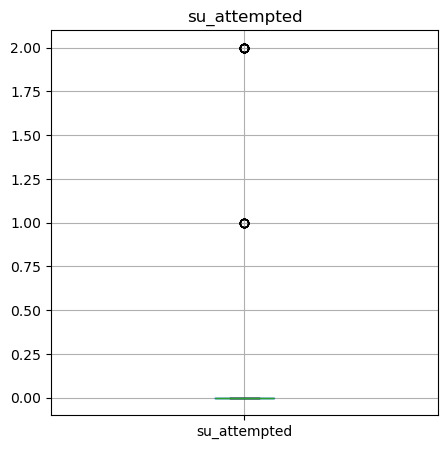

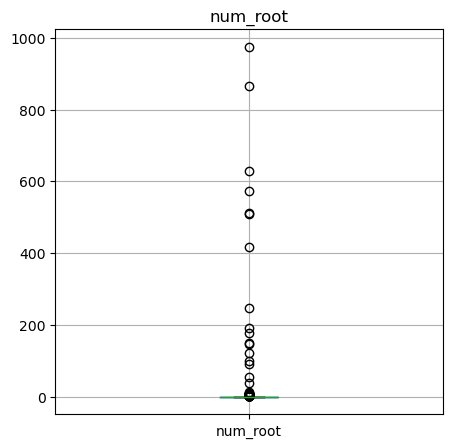

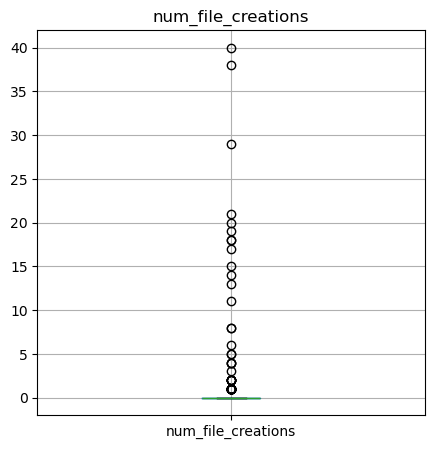

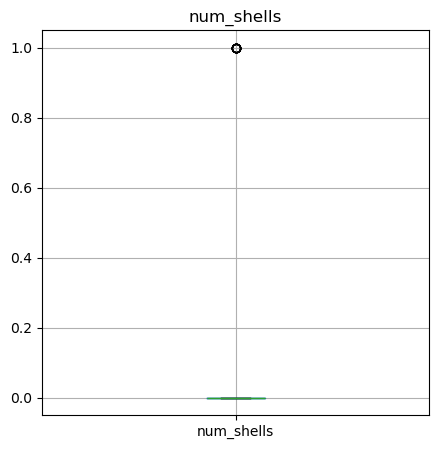

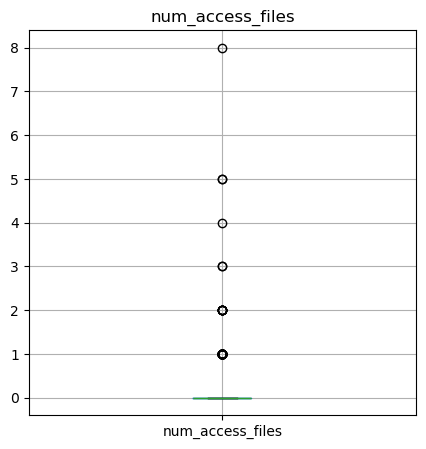

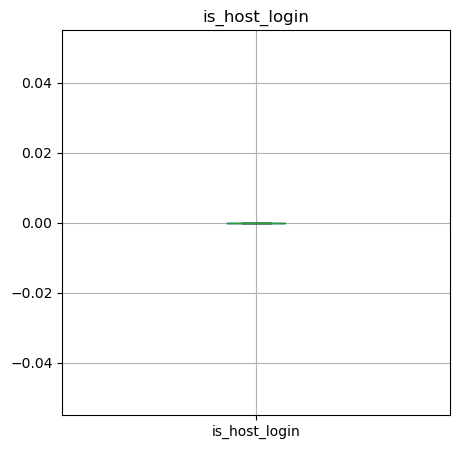

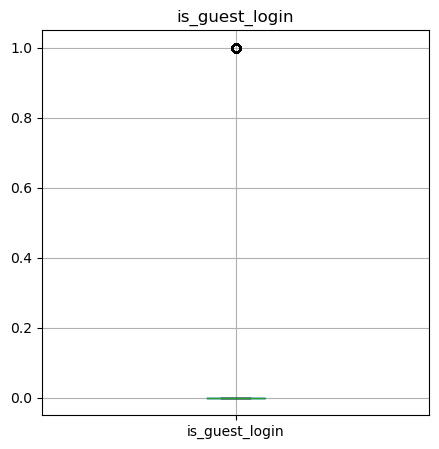

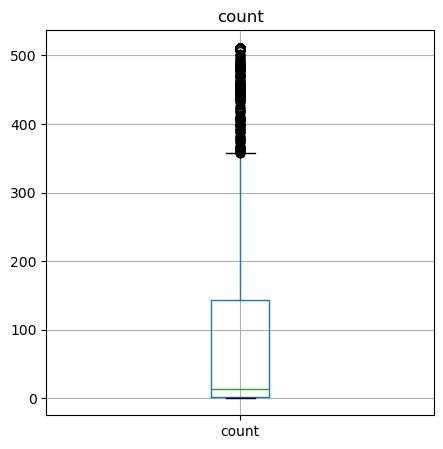

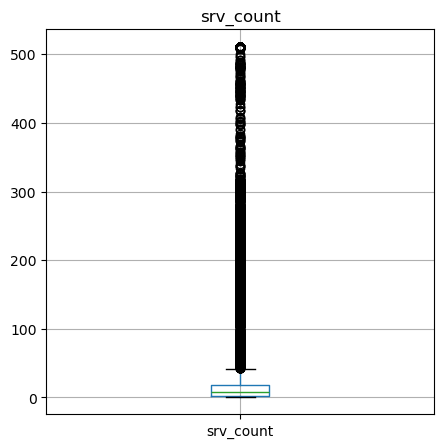

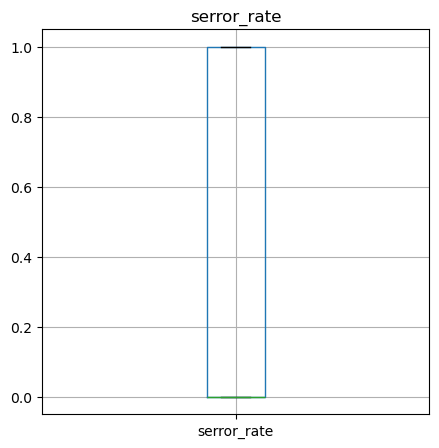

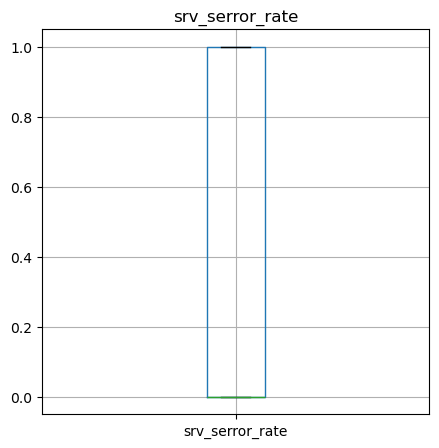

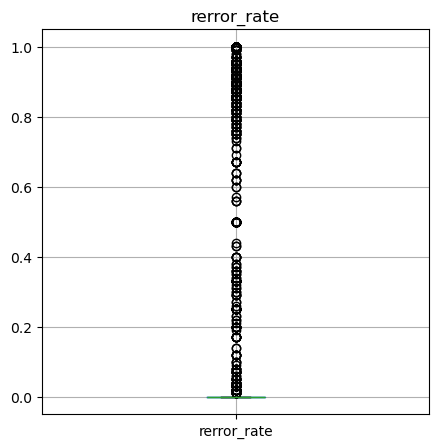

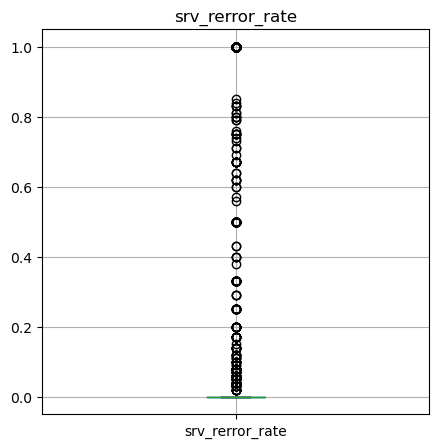

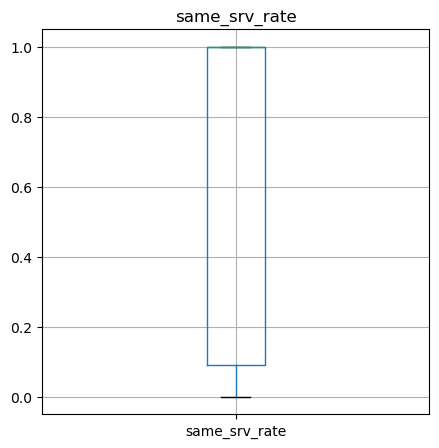

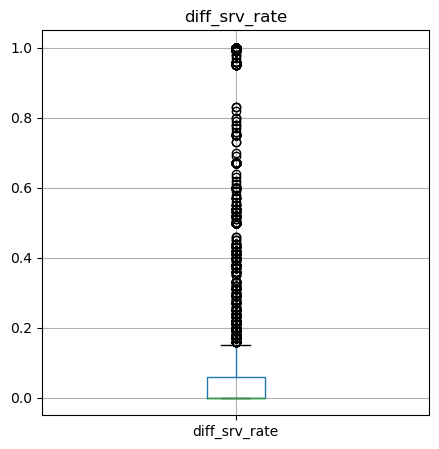

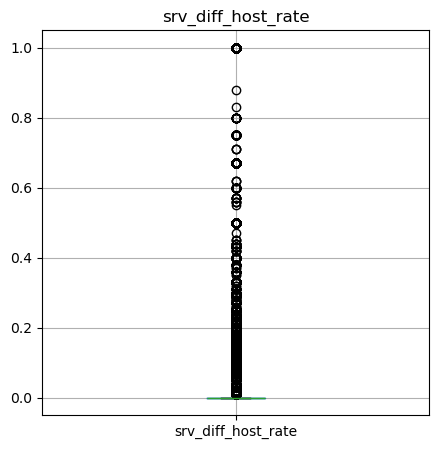

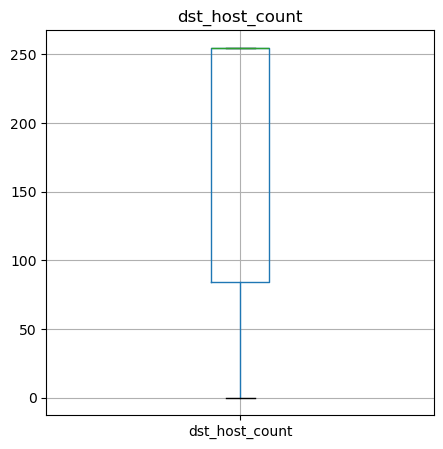

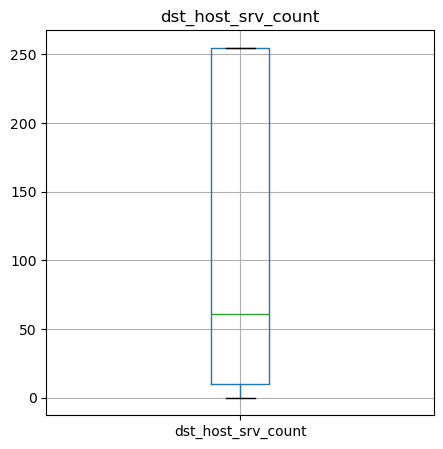

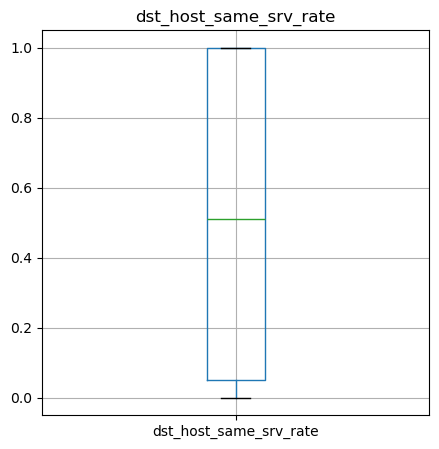

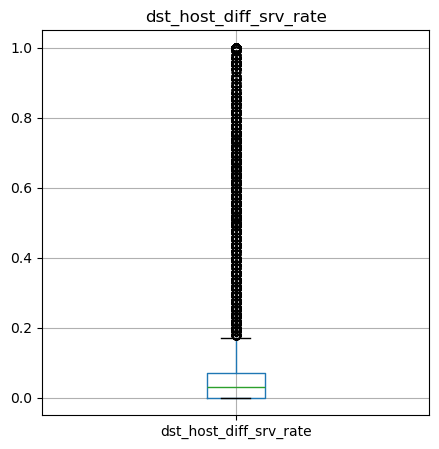

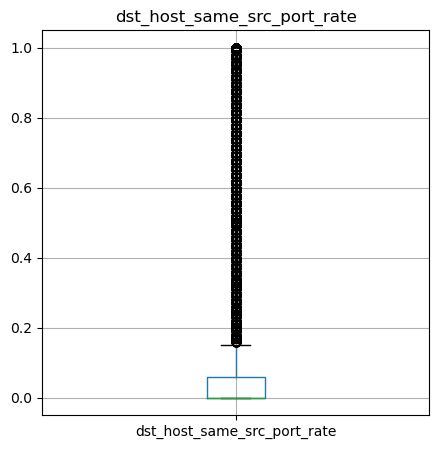

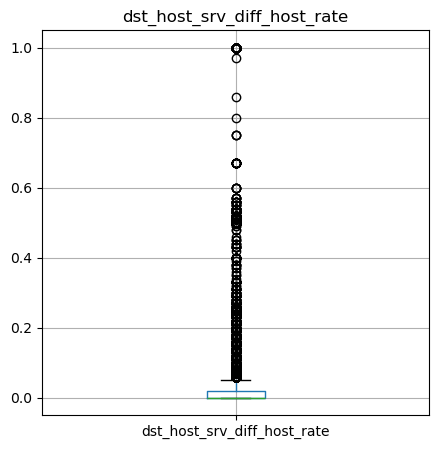

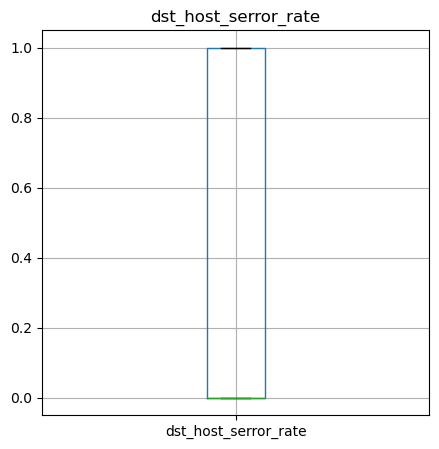

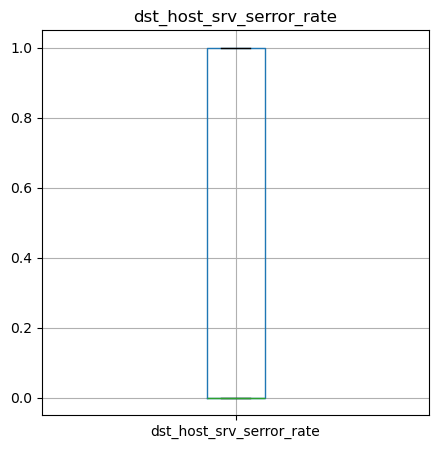

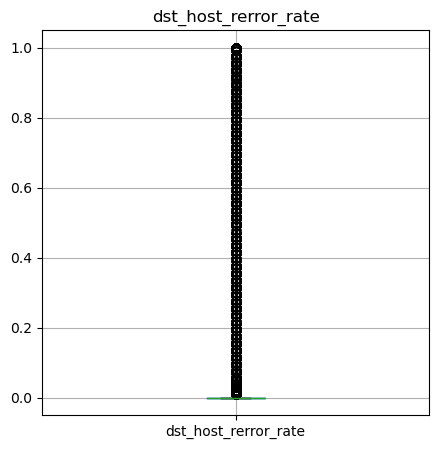

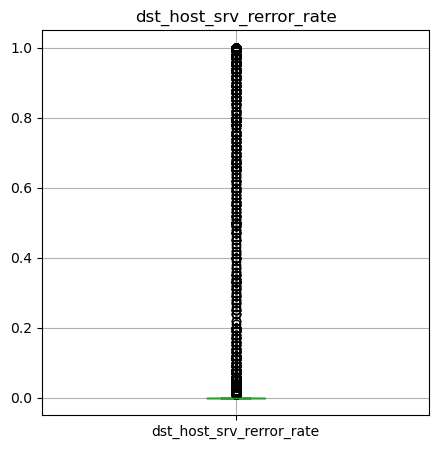

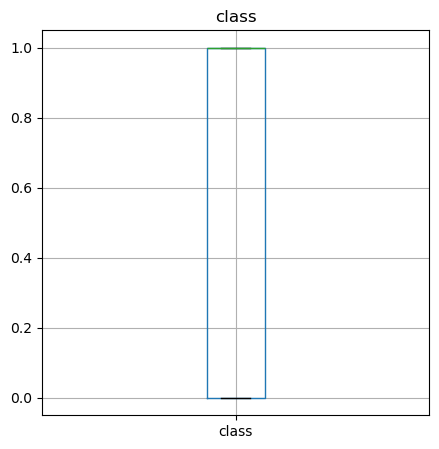

In [41]:
for col in train_data.select_dtypes(include = ['int', 'float']).columns:
  fig, aux = plt.subplots(figsize = (5, 5))
  aux.set_title(col)
  b_plot = train_data.boxplot(column = col, ax = aux)
  plt.show()

C:\Users\abish\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


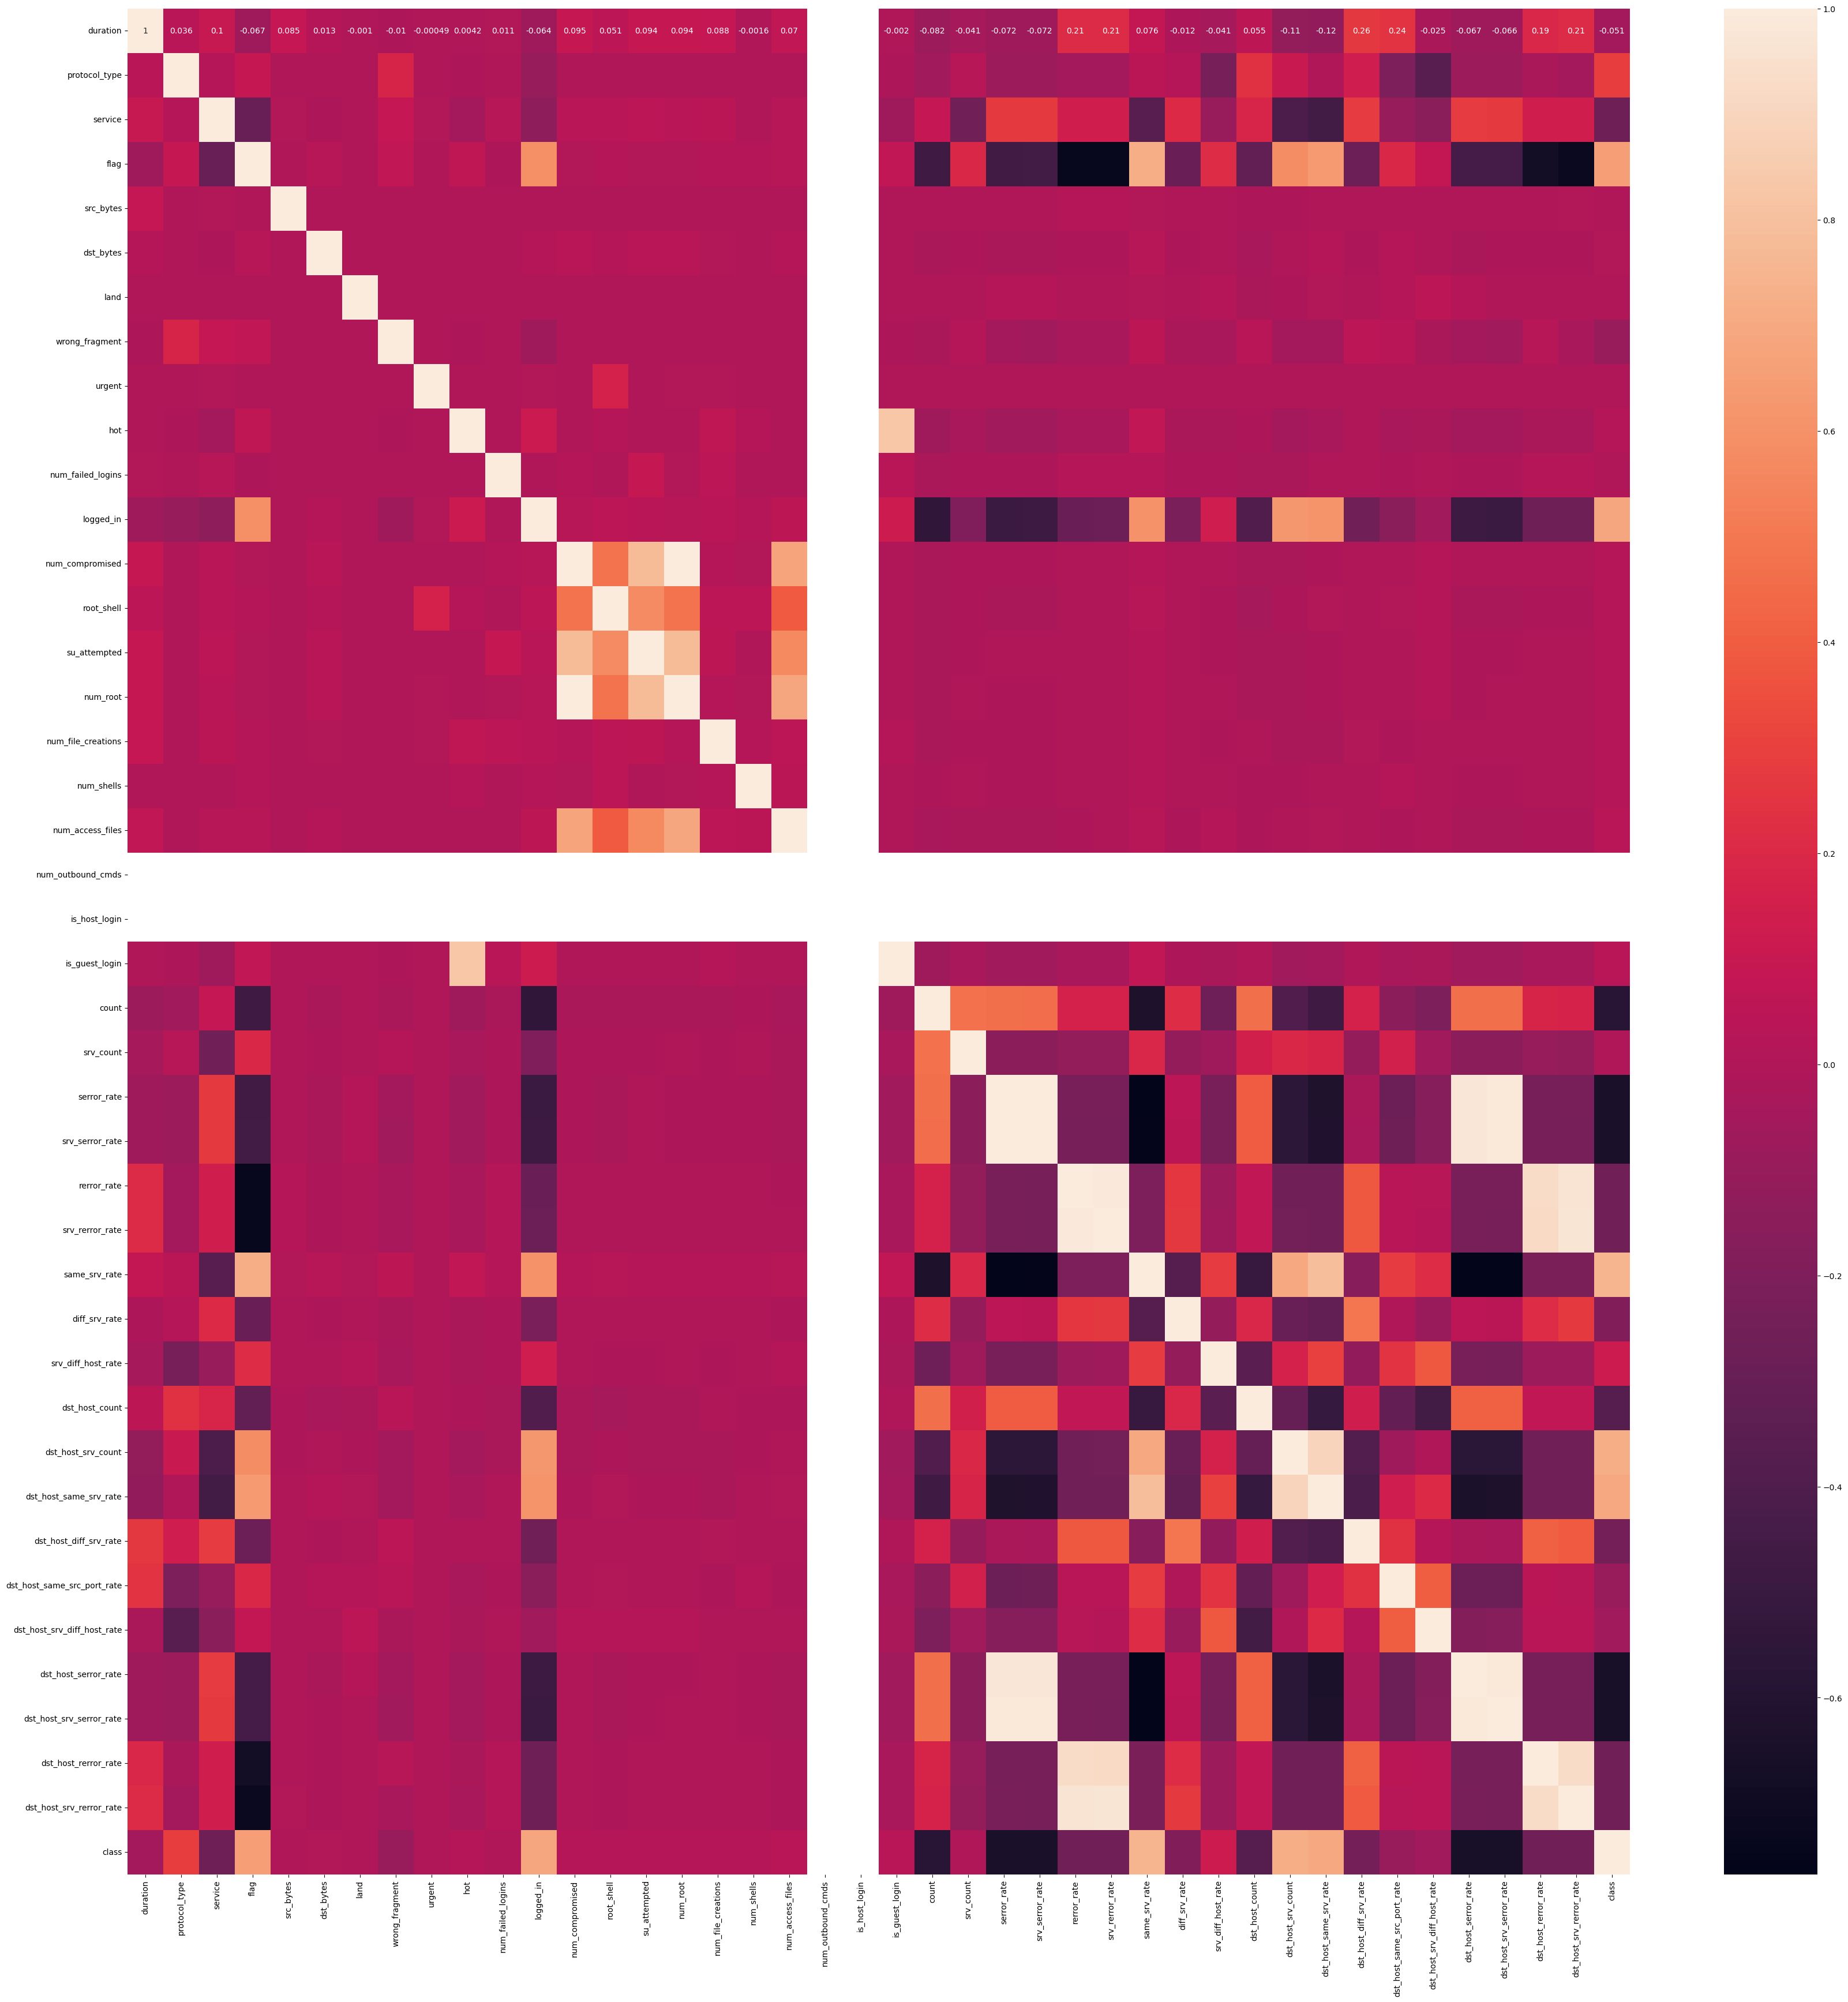

In [10]:
#Generating heatmap to find redundant columns

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(42,42))
sns.heatmap(train_data.corr(), annot=True)
plt.show()

(25192, 42)
(25192, 41)


In [12]:
#feature selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train=train_data.drop('class', axis=1)
Y_train=train_data['class']

rfc=RandomForestClassifier()
rfe=RFE(rfc, n_features_to_select=10)
rfe=rfe.fit(X_train, Y_train)

feature_map=[(i,v) for i,v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features=[v for i,v in feature_map if i==True]
selected_features

['protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate']

In [13]:
X_train=X_train[selected_features]
X_train.head()

,protocol_type,service,flag,src_bytes,dst_bytes,count,same_srv_rate,diff_srv_rate,dst_host_srv_count,dst_host_same_srv_rate
0,1,19,9,491,0,2,1.00,0.00,25,0.17
1,2,41,9,146,0,13,0.08,0.15,1,0.00
2,1,46,5,0,0,123,0.05,0.07,26,0.10
3,1,22,9,232,8153,5,1.00,0.00,255,1.00
4,1,22,9,199,420,30,1.00,0.00,255,1.00


In [14]:
scale=StandardScaler()
X_train=scale.fit_transform(X_train)

In [15]:
#DATASET PARTITION
x_train,x_test,y_train,y_test = train_test_split(X_train, Y_train, train_size=0.70, random_state=2)

In [16]:
x_train.shape

(17634, 10)

In [17]:
x_test.shape

(7558, 10)

In [18]:
y_train.shape

(17634,)

In [19]:
y_test.shape

(7558,)

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve

nb_classifier=GaussianNB()
nb_classifier.fit(x_train, y_train)

GaussianNB()

In [21]:
y_pred_nb=nb_classifier.predict(x_test)
nb_accuracy=accuracy_score(y_test, y_pred_nb)
nb_accuracy

0.8919026197406721

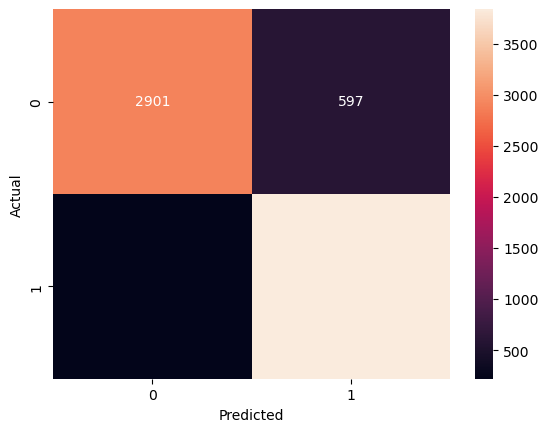

In [22]:
cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

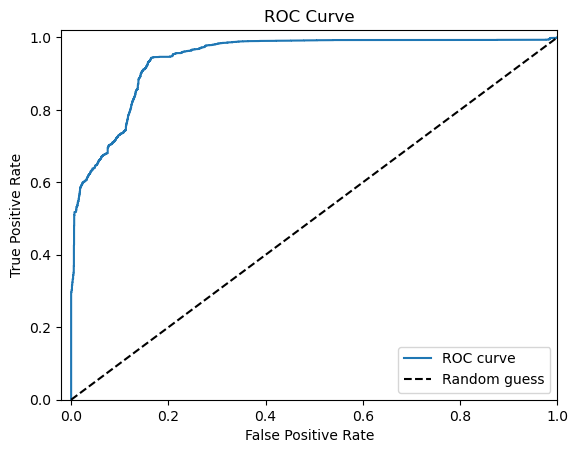

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

y_pred_prob = nb_classifier.predict_proba(x_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve

dt_classifier=DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [25]:
y_pred_dt=dt_classifier.predict(x_test)
dt_accuracy=accuracy_score(y_test, y_pred_dt)
dt_accuracy

0.9948399047367028

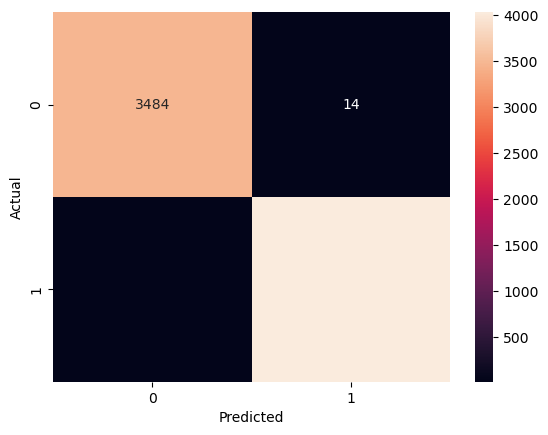

In [26]:
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

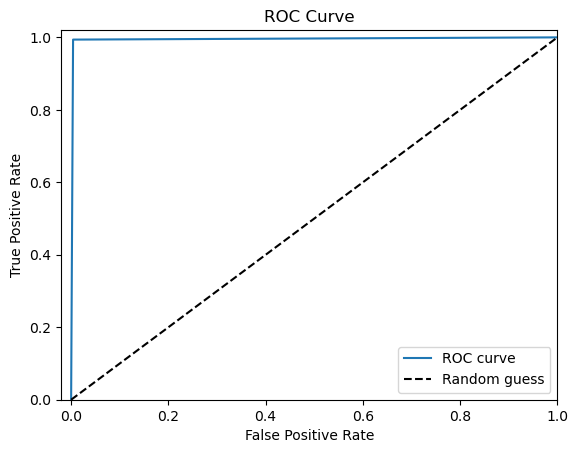

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

y_pred_prob = dt_classifier.predict_proba(x_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

# save figure
plt.savefig('roc_curve.png', dpi=200)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve

knn_classifier=KNeighborsClassifier()
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [29]:
y_pred_knn=knn_classifier.predict(x_test)
knn_accuracy=accuracy_score(y_test, y_pred_knn)
knn_accuracy

0.9830643027255888

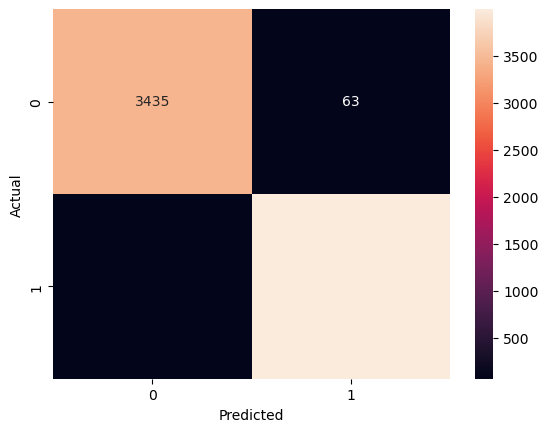

In [30]:
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

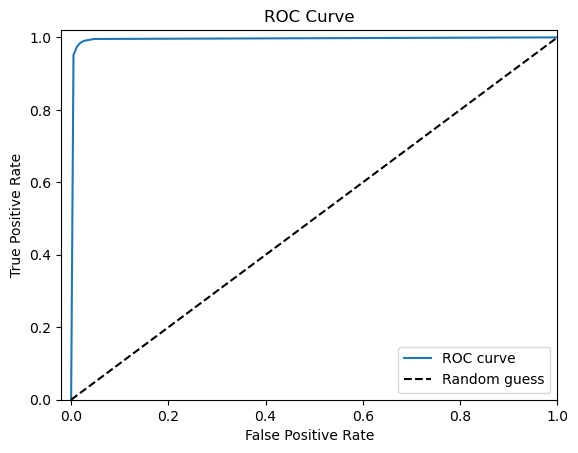

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

y_pred_prob = knn_classifier.predict_proba(x_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

# save figure
plt.savefig('roc_curve.png', dpi=200)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve

lr_classifier=LogisticRegression()
lr_classifier.fit(x_train, y_train)

LogisticRegression()

In [33]:
y_pred_lr=lr_classifier.predict(x_test)
lr_accuracy=accuracy_score(y_test, y_pred_lr)
lr_accuracy

0.9231278115903678

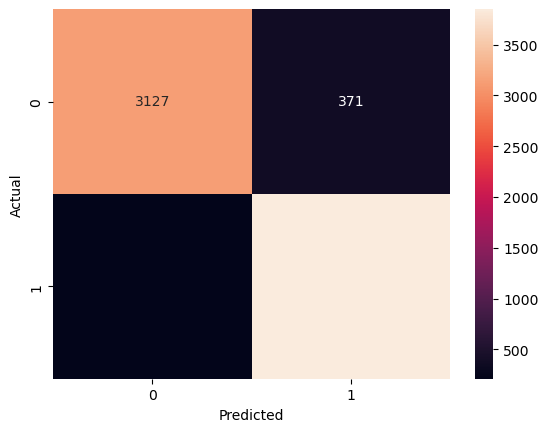

In [34]:
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

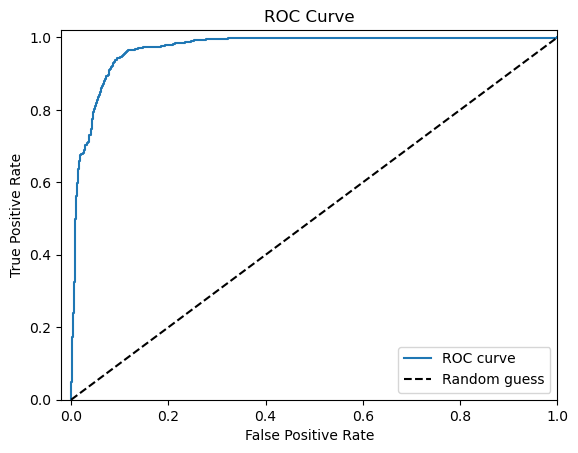

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

y_pred_prob = lr_classifier.predict_proba(x_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

# save figure
plt.savefig('roc_curve.png', dpi=200)